In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = df.drop(['petal length (cm)','petal width (cm)'],axis=1)

In [6]:
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


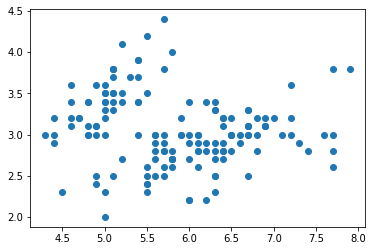

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [54]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)

In [55]:
y_predicted = km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])

In [56]:
y_predicted

array([1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 3, 0, 0, 4, 0, 4, 0, 2, 0, 2, 4, 4, 4, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4,
       4, 4, 4, 0, 4, 2, 4, 4, 4, 0, 2, 4, 0, 4, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 4, 4, 0, 0, 3, 3, 4, 0, 4, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3,
       0, 0, 4, 3, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4])

In [57]:
df['cluster'] = y_predicted
df

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,1
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,0
147,6.5,3.0,0
148,6.2,3.4,0


In [58]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]


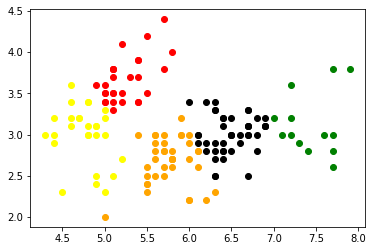

In [59]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='black')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='yellow')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green')
plt.scatter(df4['sepal length (cm)'],df4['sepal width (cm)'],color='orange')

In [52]:
sse=[]
k_rng = range(2,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    y_predicted = km.fit(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(y_predicted.inertia_)

In [ ]:
sse

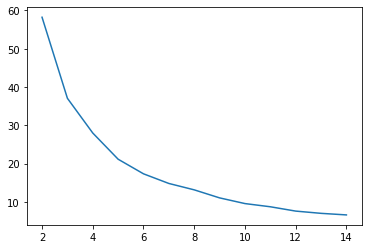

In [53]:
plt.plot(k_rng,sse)